In [ ]:
import numpy as np
import pandas as pd

In [ ]:
file_path = r'C:\Users\rashm\OneDrive\Documents\Numpy Ninja\Python Hackathon\OrganDonor_Consolidated.xlsx'
df = pd.ExcelFile(file_path)

In [25]:
# Load the excelsheet
donor_details = df.parse('DonorDetails')
outcomes = df.parse('Outcomes')
referral_details = df.parse('ReferralDetails')
hosp_details = df.parse('OPO_HospDetails')
yearly_outcomes = df.parse('Yearly_Outcomes')

#### Q 71. Which year recorded the highest number of organ procurements from patients who died due to stroke as the mechanism of death? Display this information using a bar chart.

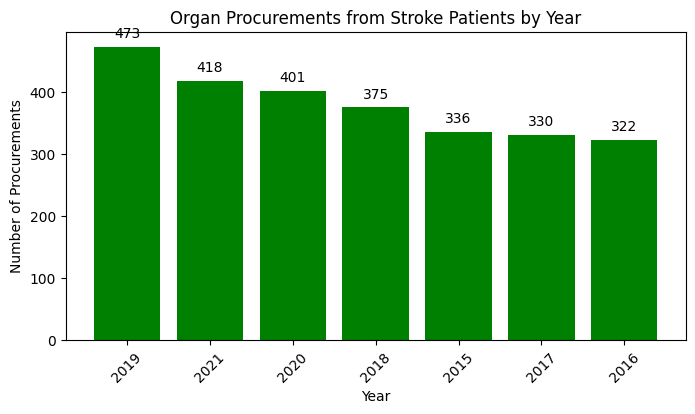

In [75]:

# Lets start with merging data: outcomes and patient_details and referral_details
merged_data_1 = pd.merge(donor_details, outcomes, on='PatientID', how='inner')

merged_data = pd.merge(merged_data_1, referral_details, on='PatientID', how='inner')

# Filter rows where cause of Death is 'stroke'
stroke_data = merged_data[merged_data['mechanism_of_death'] == 'Stroke']

# Group by 'Referral_Year' and count the number of rows (referrals) for each year
stroke_procurements = stroke_data.groupby('Referral_Year').size().reset_index(name='PatientCount')

stroke_procurements = stroke_procurements.sort_values(by='PatientCount', ascending=False)

# Display the year with the highest number of procurements
highest_year = stroke_procurements.iloc[0]

# Plot the results using a bar chart
plt.figure(figsize=(8, 4))
bars = plt.bar(stroke_procurements['Referral_Year'].astype(str), stroke_procurements['PatientCount'], color='green')
# Add annotations to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10,
             str(yval), ha='center', va='bottom', fontsize=10)
plt.xlabel('Year')
plt.ylabel('Number of Procurements')
plt.title('Organ Procurements from Stroke Patients by Year')
plt.xticks(rotation=45)
plt.show()